In [5]:
import xarray as xr
import matplotlib.pyplot as plt


In [3]:
# Define the path to the Zarr dataset
path = '/scratch/nf33/Healpix_data/ICON/P1D_inst_z1_atm.zarr'

# Open the Zarr store using xarray
ds = xr.open_zarr(path, consolidated=False)

# Display dataset information
print(ds)


<xarray.Dataset> Size: 21MB
Dimensions:       (crs: 1, time: 425, cell: 48, pressure: 30, pressure_rva: 3)
Coordinates:
  * crs           (crs) float32 4B nan
  * pressure      (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva  (pressure_rva) int64 24B 16 18 23
  * time          (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/23)
    egpvi         (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    einvi         (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    ekhvi         (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    ekvvi         (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    hur           (time, pressure, cell) float32 2MB dask.array<chunksize=(4, 1, 48), meta=np.ndarray>
    hus           (time, pressure, cell) float32 2MB dask.array<chunksize=(4, 1, 48), meta=np.ndarra

In [4]:
# Access the variable 'pr'
pr = ds['pr']

# Display basic info about the variable
print(pr)

<xarray.DataArray 'pr' (time: 425, cell: 48)> Size: 82kB
dask.array<open_dataset-pr, shape=(425, 48), dtype=float32, chunksize=(4, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  point
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       pr
    units:               kg m-2 s-1
    short_name:          
    long_name:           precipitation flux


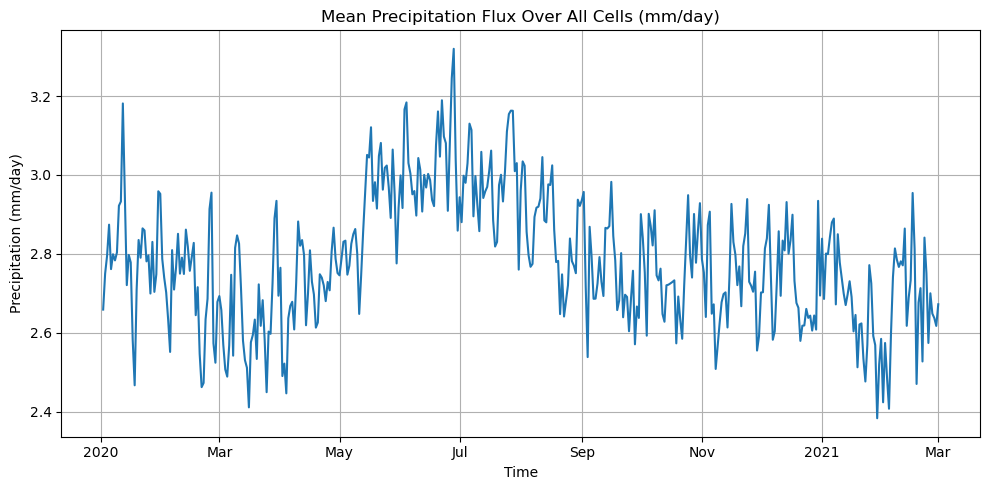

In [6]:
pr_mm_day = pr * 86400

# Mean over cells (optional: can choose specific cell instead)
pr_mean = pr_mm_day.mean(dim='cell')

# Plot
plt.figure(figsize=(10, 5))
pr_mean.plot()
plt.title('Mean Precipitation Flux Over All Cells (mm/day)')
plt.ylabel('Precipitation (mm/day)')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# extract pr at station location